In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

sns.set_context("poster")


demographics2 = pd.read_csv('demographics2.csv')
X = demographics2.iloc[:, 2:]

y = demographics2.badteeth.values

In [170]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# copy your original data frame, which includes all variables
data_cluster = demographics2.copy()

# drop Country column
data_cluster.drop( "Country", inplace=True, axis=1)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data_cluster)


clustered_data = KMeans(n_clusters=5, random_state=0).fit_predict(X_train_minmax)

print(clustered_data)


#demo['cluster'] = pd.Series(clustered_data, index=demo.index)
df_cluster = pd.DataFrame(clustered_data)
demo_cluster = pd.concat([data_cluster, df_cluster], axis=1)
demo_cluster.rename(columns={"0": "cluster", "Unnamed: 0" : "Country"}, inplace=True)

                           

print(demo_cluster.head())
countries = list(demographics2['Country'])
teeth =list(demographics2['badteeth'])

df = pd.DataFrame({'labels' : clustered_data, 'Countries' : countries, 'badteeth' : teeth})

print(df.head())

df.groupby('labels').describe()



[4 4 1 4 3 4 1 4 4 4 1 1 1 1 3 4 3 4 2 4 4 1 1 4 2 4 1 1 3 1 3 3 4 1 2 3 1
 1 1 1 0 1 1 3 3 0 1 1 0 1 3 1 1 1 0 0 0 0 1 3 2 1 0 2 0 0 0 0 1 0 0 0 1 3
 0 0 1 0]
   Country  badteeth  literacy_avg  water_avg      GDP_avg   sugar_avg  \
0        0      3.02     98.712978       88.0  1011.752695   49.504318   
1        1      2.30     59.752193       90.4  1625.140989   67.995227   
2        2      1.70     67.405416       38.4   318.739949   33.129091   
3        3      0.70     98.950000       98.0  7874.822798   98.443182   
4        4      2.70     98.737052       98.0  1196.023043  100.526923   

   health_avg  Low_BMI  Adolescent birth rate  Tobacco_Use  Smokers  0  
0   24.751387      1.9                   19.7         11.8     11.5  4  
1   50.424490      6.2                   12.4          9.0      5.7  4  
2   12.275108     10.3                  190.9         19.8      2.3  1  
3  259.996606      3.5                   66.8         11.9      7.4  4  
4   64.079201      2.5        

badteeth                                                     
          count      mean       std   min     25%   50%    75%   max
labels                                                              
0          18.0  1.897222  0.943160  0.60  1.2250  1.45  2.650  3.80
1          29.0  1.423448  0.965469  0.30  0.6500  1.30  2.200  3.94
2           5.0  2.728000  1.853354  1.14  1.8000  2.20  2.600  5.90
3          12.0  3.000000  1.108644  1.10  2.3750  3.30  3.425  4.90
4          14.0  2.102143  1.470417  0.50  1.0675  1.75  2.700  5.20

In [171]:
zero = df[df['labels'] == 0]
one = df[df['labels'] == 1]
two = df[df['labels'] == 2]
three = df[df['labels'] == 3]
four = df[df['labels'] == 4]

In [172]:
model = KMeans(n_clusters=5, random_state=0).fit(X_train_minmax)
print(model.inertia_)

22.0877887452


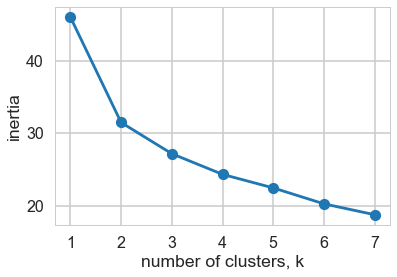

In [173]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train_minmax)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [174]:
fourclusters = KMeans(n_clusters=4, random_state=0).fit(X_train_minmax)
print(fourclusters.inertia_)

24.5432657016


In [175]:
print(zero.describe())
print(zero)

        badteeth  labels
count  18.000000    18.0
mean    1.897222     0.0
std     0.943160     0.0
min     0.600000     0.0
25%     1.225000     0.0
50%     1.450000     0.0
75%     2.650000     0.0
max     3.800000     0.0
              Countries  badteeth  labels
40             Maldives      2.10       0
45             Mongolia      1.90       0
48              Namibia      1.20       0
54               Panama      3.60       0
55             Paraguay      3.80       0
56          Philippines      2.90       0
57              Romania      2.80       0
62           Seychelles      1.50       0
64         South Africa      1.05       0
65            Sri Lanka      1.40       0
66            Swaziland      0.90       0
67           Tajikistan      1.20       0
69  Trinidad and Tobago      0.60       0
70              Tunisia      1.30       0
71               Turkey      2.70       0
74              Uruguay      2.50       0
75           Uzbekistan      1.40       0
77             Zimb

In [176]:
print(one.describe())
print(one)

        badteeth  labels
count  29.000000    29.0
mean    1.423448     1.0
std     0.965469     0.0
min     0.300000     1.0
25%     0.650000     1.0
50%     1.300000     1.0
75%     2.200000     1.0
max     3.940000     1.0
        Countries  badteeth  labels
2          Angola      1.70       1
6           Benin      0.80       1
10   Burkina Faso      0.70       1
11        Burundi      1.00       1
12       Cambodia      2.30       1
13       Cameroon      1.50       1
21       Ethiopia      1.55       1
22         Gambia      2.30       1
26  Guinea-Bissau      0.50       1
27          Haiti      0.65       1
29          India      3.94       1
33          Kenya      1.35       1
36        Lesotho      0.40       1
37        Liberia      0.40       1
38     Madagascar      3.10       1
39         Malawi      0.70       1
41           Mali      2.20       1
42     Mauritania      2.00       1
46        Morocco      2.50       1
47     Mozambique      3.05       1
49          Nepal  

In [177]:
print(two.describe())
print(two)

       badteeth  labels
count  5.000000     5.0
mean   2.728000     2.0
std    1.853354     0.0
min    1.140000     2.0
25%    1.800000     2.0
50%    2.200000     2.0
75%    2.600000     2.0
max    5.900000     2.0
       Countries  badteeth  labels
18        Cyprus      1.14       2
24        Greece      2.20       2
34        Kuwait      2.60       2
60  Saudi Arabia      5.90       2
63      Slovenia      1.80       2


In [178]:
print(three.describe())
print(three)

        badteeth  labels
count  12.000000    12.0
mean    3.000000     3.0
std     1.108644     0.0
min     1.100000     3.0
25%     2.375000     3.0
50%     3.300000     3.0
75%     3.425000     3.0
max     4.900000     3.0
    Countries  badteeth  labels
4     Belarus       2.7       3
14      Chile       3.4       3
16    Croatia       3.5       3
28    Hungary       3.3       3
30    Jamaica       1.1       3
31     Jordan       3.3       3
35     Latvia       3.4       3
43  Mauritius       4.9       3
44     Mexico       2.0       3
50  Nicaragua       1.5       3
59      Samoa       2.5       3
73    Ukraine       4.4       3


In [179]:
print(four.describe())
print(four)

        badteeth  labels
count  14.000000    14.0
mean    2.102143     4.0
std     1.470417     0.0
min     0.500000     4.0
25%     1.067500     4.0
50%     1.750000     4.0
75%     2.700000     4.0
max     5.200000     4.0
                 Countries  badteeth  labels
0                  Albania      3.02       4
1                  Algeria      2.30       4
3      Antigua and Barbuda      0.70       4
5                   Belize      0.60       4
7   Bosnia and Herzegovina      4.80       4
8                 Botswana      0.50       4
9                   Brazil      2.80       4
15                   China      1.03       4
17                    Cuba      1.40       4
19                   Egypt      1.18       4
20             El Salvador      1.40       4
23                 Georgia      2.40       4
25               Guatemala      5.20       4
32              Kazakhstan      2.10       4


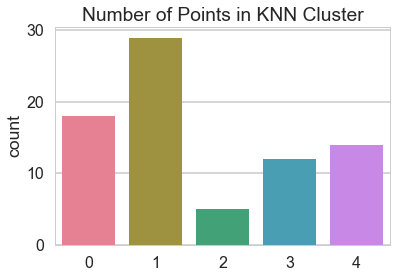

In [180]:
plt.figure()
#sns.countplot(data= df, x=labels).set_title('Number of Points in each Cluster')

cluster_size = df.groupby(clustered_data).size()

sns.countplot(clustered_data, palette='husl').set_title('Number of Points in KNN Cluster')

plt.show()

In [181]:
# create and fit pca
pca = PCA(n_components=2)
pca.fit(X_train_minmax.T)

# print results
print('explained variance ratio:', pca.explained_variance_ratio_)
print('components shape:', pca.components_.shape)

explained variance ratio: [ 0.53071025  0.18396235]
components shape: (2, 78)


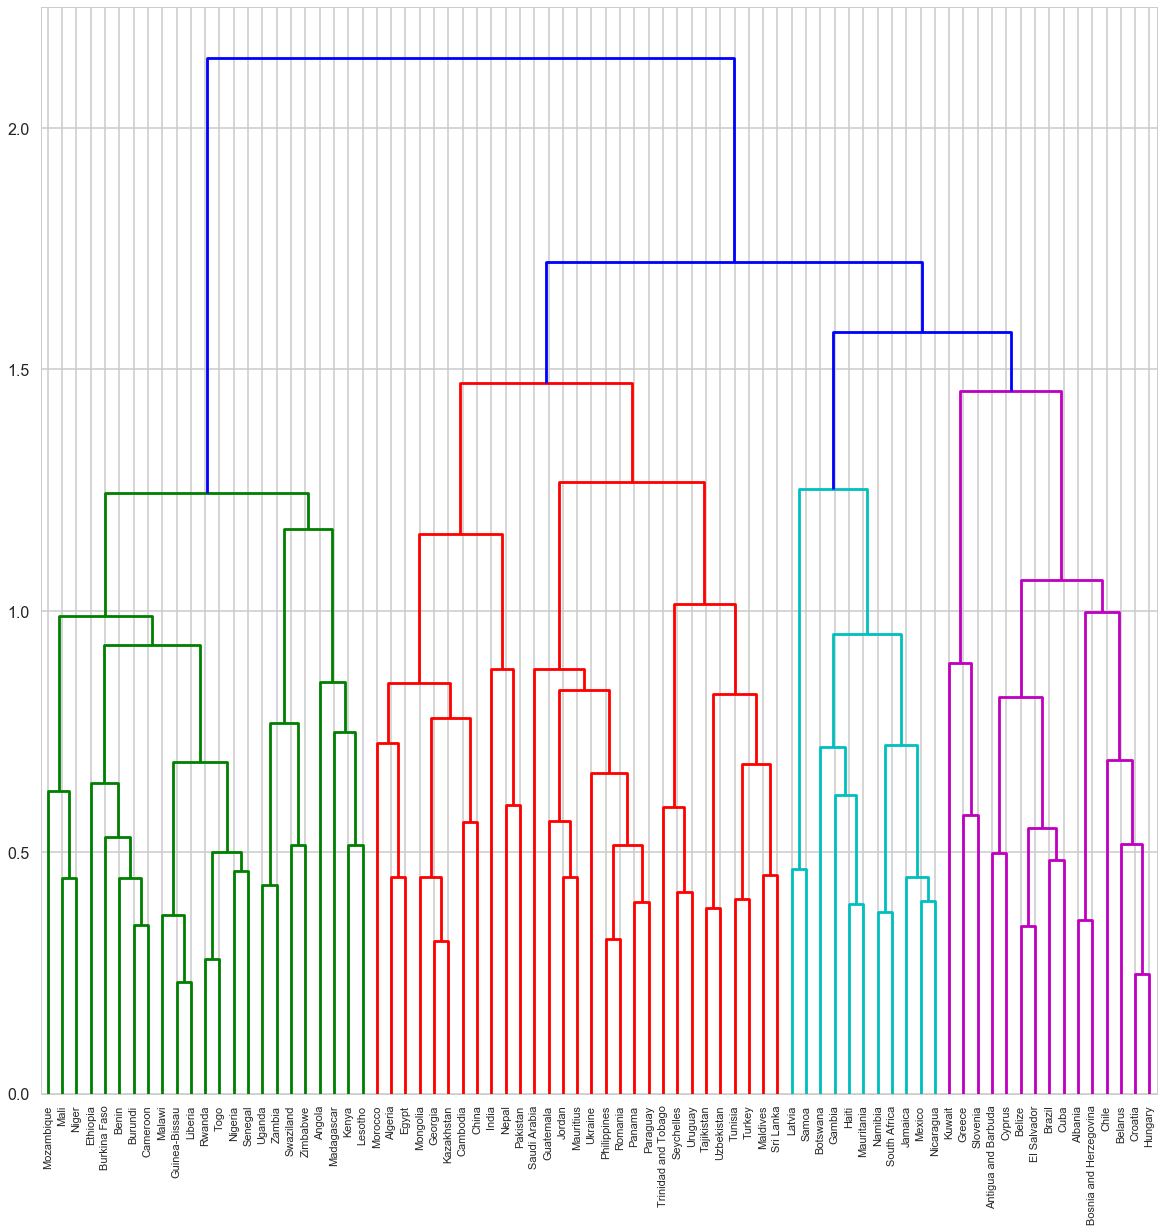

In [182]:
mergings = linkage(X_train_minmax, method='complete')

plt.figure(figsize=(20,20))
dendrogram(mergings,
           labels=countries,
           leaf_rotation=90,
           leaf_font_size=11,
)


plt.show()

In [183]:
flabels = fcluster(mergings, 1.5, criterion='distance')
print(flabels)

[4 2 1 4 4 4 1 4 3 4 1 1 2 1 4 2 4 4 4 2 4 1 3 2 4 2 1 3 4 2 3 2 2 1 4 3 1
 1 1 1 2 1 3 2 3 2 2 1 3 2 3 1 1 2 2 2 2 2 1 3 2 1 2 4 3 2 1 2 1 2 2 2 1 2
 2 2 1 1]


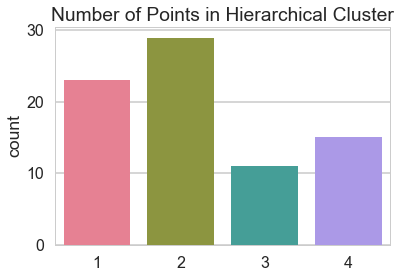

In [184]:
plt.figure()

cluster_size = df.groupby(flabels).size()

sns.countplot(flabels, palette='husl').set_title('Number of Points in Hierarchical Cluster')

plt.show()

In [185]:
demograph= demographics2.loc[:, 'Country':'Smokers'].astype(str)
demograph.Country = demograph.Country.astype(str)
demograph.Country = demograph.Country.str.encode('utf-8')

print(demograph.Country)

0                    b'Albania'
1                    b'Algeria'
2                     b'Angola'
3        b'Antigua and Barbuda'
4                    b'Belarus'
5                     b'Belize'
6                      b'Benin'
7     b'Bosnia and Herzegovina'
8                   b'Botswana'
9                     b'Brazil'
10              b'Burkina Faso'
11                   b'Burundi'
12                  b'Cambodia'
13                  b'Cameroon'
14                     b'Chile'
15                     b'China'
16                   b'Croatia'
17                      b'Cuba'
18                    b'Cyprus'
19                     b'Egypt'
20               b'El Salvador'
21                  b'Ethiopia'
22                    b'Gambia'
23                   b'Georgia'
24                    b'Greece'
25                 b'Guatemala'
26             b'Guinea-Bissau'
27                     b'Haiti'
28                   b'Hungary'
29                     b'India'
                ...            
48      

In [186]:
world = pd.read_excel('countries of the world.xls', header = 3).loc[1:, 'Country':'Region'].astype(str)
world.Country = world.Country.astype(str)
world.Country = world.Country.str[:-1]
world.Country = world.Country.str.replace('&','and')
world.Country = world.Country.str.encode('utf-8')

print(world.Country)

1                 b'Afghanistan'
2                     b'Albania'
3                     b'Algeria'
4              b'American Samoa'
5                     b'Andorra'
6                      b'Angola'
7                    b'Anguilla'
8         b'Antigua and Barbuda'
9                   b'Argentina'
10                    b'Armenia'
11                      b'Aruba'
12                  b'Australia'
13                    b'Austria'
14                 b'Azerbaijan'
15               b'Bahamas, The'
16                    b'Bahrain'
17                 b'Bangladesh'
18                   b'Barbados'
19                    b'Belarus'
20                    b'Belgium'
21                     b'Belize'
22                      b'Benin'
23                    b'Bermuda'
24                     b'Bhutan'
25                    b'Bolivia'
26     b'Bosnia and Herzegovina'
27                   b'Botswana'
28                     b'Brazil'
29         b'British Virgin Is.'
30                     b'Brunei'
          

In [187]:
regionscheck = pd.merge(demograph, world, on='Country', how='left')
regionscheck.Region = regionscheck.Region.fillna('SUB-SAHARAN AFRICA')
print(regionscheck.head())

                  Country badteeth   literacy_avg water_avg        GDP_avg  \
0              b'Albania'     3.02  98.7129780777      88.0  1011.75269494   
1              b'Algeria'      2.3  59.7521926392      90.4   1625.1409887   
2               b'Angola'      1.7  67.4054160383      38.4  318.739948801   
3  b'Antigua and Barbuda'      0.7          98.95      98.0  7874.82279781   
4              b'Belarus'      2.7  98.7370522886      98.0  1196.02304297   

       sugar_avg     health_avg Low_BMI Adolescent birth rate Tobacco_Use  \
0  49.5043181818  24.7513865611     1.9                  19.7        11.8   
1  67.9952272727  50.4244901922     6.2                  12.4         9.0   
2  33.1290909091  12.2751083489    10.3                 190.9        19.8   
3  98.4431818182  259.996606047     3.5                  66.8        11.9   
4  100.526923077  64.0792013689     2.5                  21.6        26.9   

  Smokers                               Region  
0    11.5  EASTERN 

In [188]:
#df = df.drop['badteeth']
df['Region'] = regionscheck['Region']
df = df.pivot_table(index='labels',columns='Region',aggfunc='count')
print(df)

                           Countries                                      \
Region ASIA (EX. NEAR EAST)          BALTICS                               
labels                                                                     
0                                4.0                                 NaN   
1                                4.0                                 NaN   
2                                NaN                                 NaN   
3                                NaN                                 1.0   
4                                1.0                                 NaN   

                                                                 \
Region C.W. OF IND. STATES  EASTERN EUROPE                        
labels                                                            
0                       2.0                                 1.0   
1                       NaN                                 NaN   
2                       NaN                             